# • DOMAIN:
    Electronics and Telecommunication

# CONTEXT: 
    A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

# DATA DESCRIPTION: 
    The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

# PROJECT OBJECTIVE: 
    The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].

In [3]:
!pip install klib
!pip install plotly

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install keras_tuner

In [1]:
# Basic Mathematical Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Statstical packages
from scipy.stats import zscore,ttest_ind,f_oneway,chi2,chi2_contingency
import  scipy.stats as stats
from statsmodels.stats import anova
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import h5py
# Preprocessig packages
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split,StratifiedKFold
import plotly
import klib
# Handeling data imbalance
from imblearn.over_sampling import SMOTE,SMOTENC
# Model for feature extraction
from sklearn.decomposition import PCA
# Neural Network Packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
#  Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.style as style
sns.set(rc={'figure.figsize':(15,10)})
style.use('fivethirtyeight')
# Visualization package:
import plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
# display options
pd.options.display.max_rows=100
pd.options.display.max_columns=100

### Import data.

In [7]:
data=pd.read_csv('/content/drive/MyDrive/Part- 1 - Signal.csv')

In [8]:
data.head(5)

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [9]:
data.tail(5)

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1596          6.3        0.510         0.13          2.3        0.076   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
1594         32.0         44.0      0.99490         3.45          0.58   
1595         39.0         51.0      0.99512         3.52          0.76   
1596         29.0         40.0      0.99574         3.42          0.75   
1597         32.0         44.0      0.99547         3.57          0.71   
1598         18.0         42.0      0.99549         3.39          0.66   

      Parameter 11  Signal_Strength  
1594          10.5                5  
1595          11.2                6  
1596          11.0                6  
1597          10.2                5  
1598          11.0                6

In [10]:
data.sample(10)

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
25            6.3        0.390         0.16          1.4        0.080   
305          10.3        0.530         0.48          2.5        0.063   
1538          6.2        0.640         0.09          2.5        0.081   
322           7.8        0.620         0.05          2.3        0.079   
102           8.1        0.545         0.18          1.9        0.080   
370           6.9        0.765         0.02          2.3        0.063   
191           6.4        0.370         0.25          1.9        0.074   
669          11.3        0.340         0.45          2.0        0.082   
788          10.0        0.560         0.24          2.2        0.079   
27            7.9        0.430         0.21          1.6        0.106   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
25           11.0         23.0      0.99550         3.34          0.56   
305           6.0         25.0      0.99980         3.12          0.59   
1538         15.0         26.0      0.99538         3.57          0.63   
322           6.0         18.0      0.99735         3.29          0.63   
102          13.0         35.0      0.99720         3.30          0.59   
370          35.0         63.0      0.99750         3.57          0.78   
191          21.0         49.0      0.99740         3.57          0.62   
669           6.0         15.0      0.99880         2.94          0.66   
788          19.0         58.0      0.99910         3.18          0.56   
27           10.0         37.0      0.99660         3.17          0.91   

      Parameter 11  Signal_Strength  
25             9.3                5  
305            9.3                6  
1538          12.0                5  
322            9.3                5  
102            9.0                6  
370            9.9                5  
191            9.8                6  
669            9.2                6  
788           10.1                6  
27             9.5                5

In [11]:
data.shape

(1599, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
data.describe(include='all').T

count       mean        std      min      25%       50%  \
Parameter 1      1599.0   8.319637   1.741096  4.60000   7.1000   7.90000   
Parameter 2      1599.0   0.527821   0.179060  0.12000   0.3900   0.52000   
Parameter 3      1599.0   0.270976   0.194801  0.00000   0.0900   0.26000   
Parameter 4      1599.0   2.538806   1.409928  0.90000   1.9000   2.20000   
Parameter 5      1599.0   0.087467   0.047065  0.01200   0.0700   0.07900   
Parameter 6      1599.0  15.874922  10.460157  1.00000   7.0000  14.00000   
Parameter 7      1599.0  46.467792  32.895324  6.00000  22.0000  38.00000   
Parameter 8      1599.0   0.996747   0.001887  0.99007   0.9956   0.99675   
Parameter 9      1599.0   3.311113   0.154386  2.74000   3.2100   3.31000   
Parameter 10     1599.0   0.658149   0.169507  0.33000   0.5500   0.62000   
Parameter 11     1599.0  10.422983   1.065668  8.40000   9.5000  10.20000   
Signal_Strength  1599.0   5.636023   0.807569  3.00000   5.0000   6.00000   

                       75%        max  
Parameter 1       9.200000   15.90000  
Parameter 2       0.640000    1.58000  
Parameter 3       0.420000    1.00000  
Parameter 4       2.600000   15.50000  
Parameter 5       0.090000    0.61100  
Parameter 6      21.000000   72.00000  
Parameter 7      62.000000  289.00000  
Parameter 8       0.997835    1.00369  
Parameter 9       3.400000    4.01000  
Parameter 10      0.730000    2.00000  
Parameter 11     11.100000   14.90000  
Signal_Strength   6.000000    8.00000

In [14]:
data.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [15]:
klib.missingval_plot(data) # returns a figure containing information about missing values

No missing values found in the dataset.


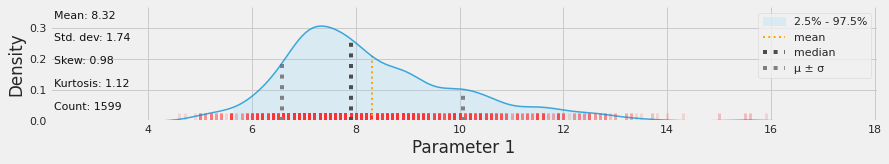

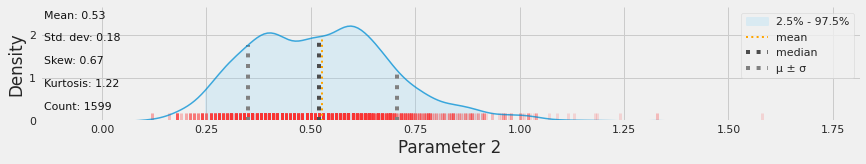

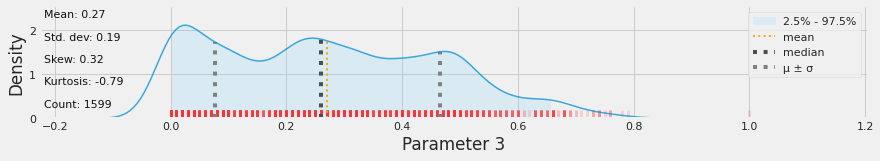

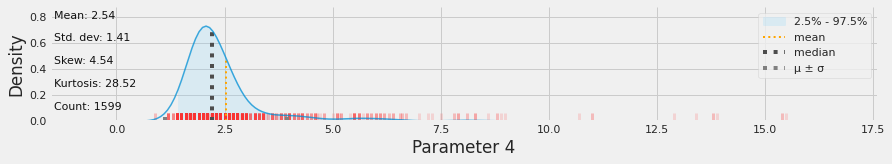

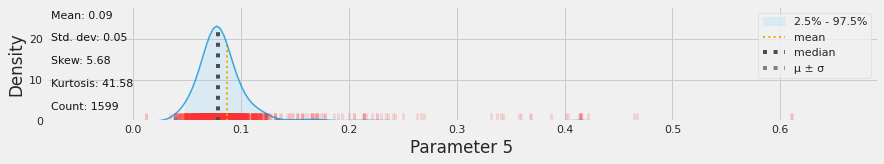

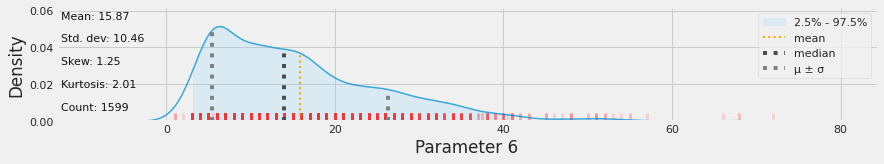

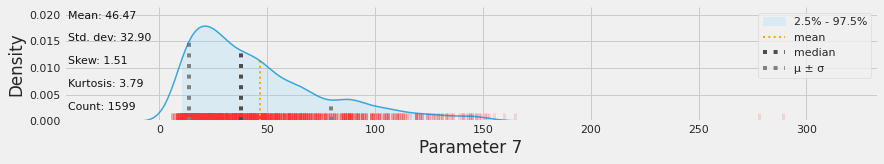

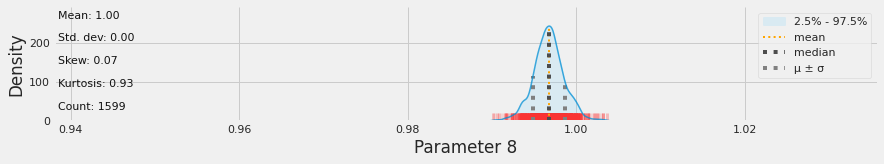

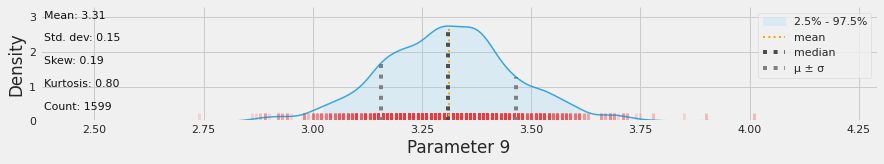

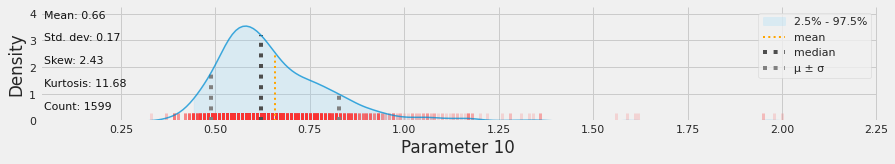

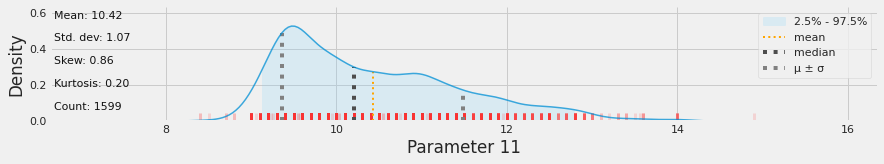

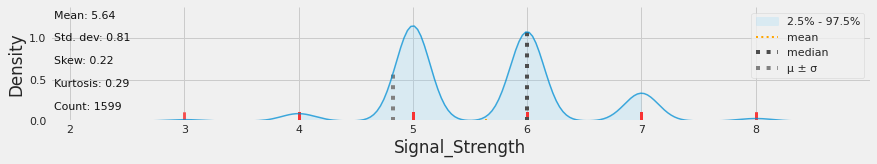

In [16]:
klib.dist_plot(data) # default representation of a distribution plot, other settings include fill_range, histogram

##### As we can see form the distribution that the features are not properly distributed and the kurtosis values are also very high for certain parameters. Therefore a good preprocessing has to be done to the features for better model

In [17]:
df_tips = px.data.tips()
px.violin(data, y="Signal_Strength", box=True, points='all')

In [18]:
fig = px.scatter_matrix(data, color='Signal_Strength')
fig

Text(0.5, 1.0, 'Distribution of Values')

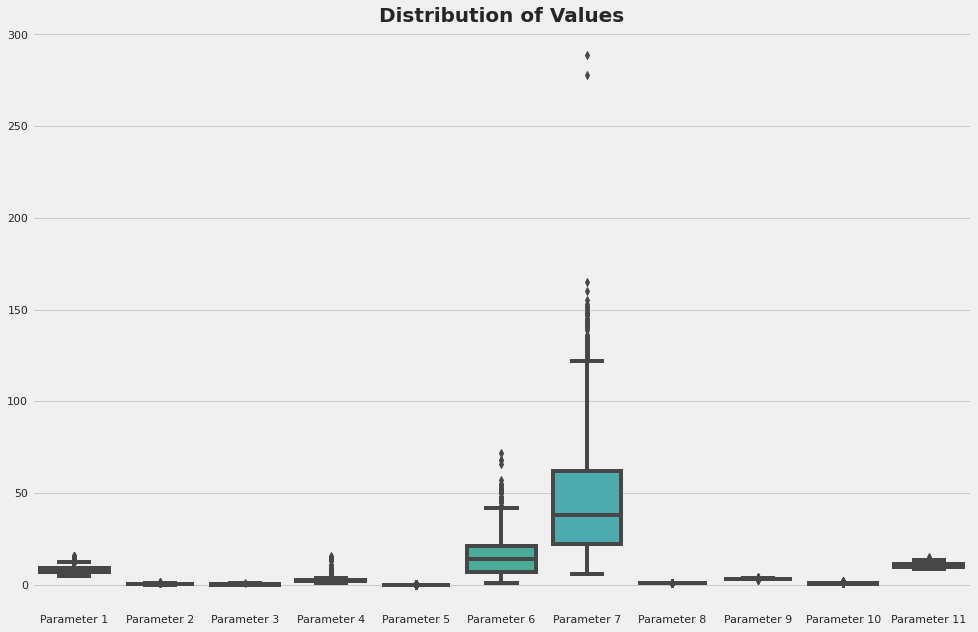

In [19]:
sns.boxplot(data=data.iloc[:,:-1]).set_title('Distribution of Values',fontsize=20,fontweight='bold')

##### Parameters 6 and 7 denotes that they has very high values and Parameters 2,3,8,9 are very low as well. Therefore we have to convert them into the same range for better analysis

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


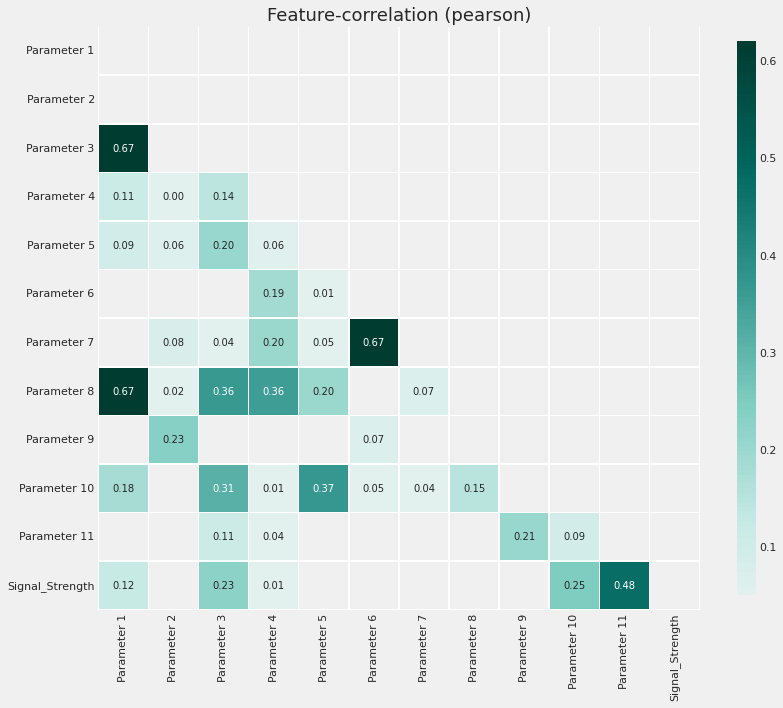

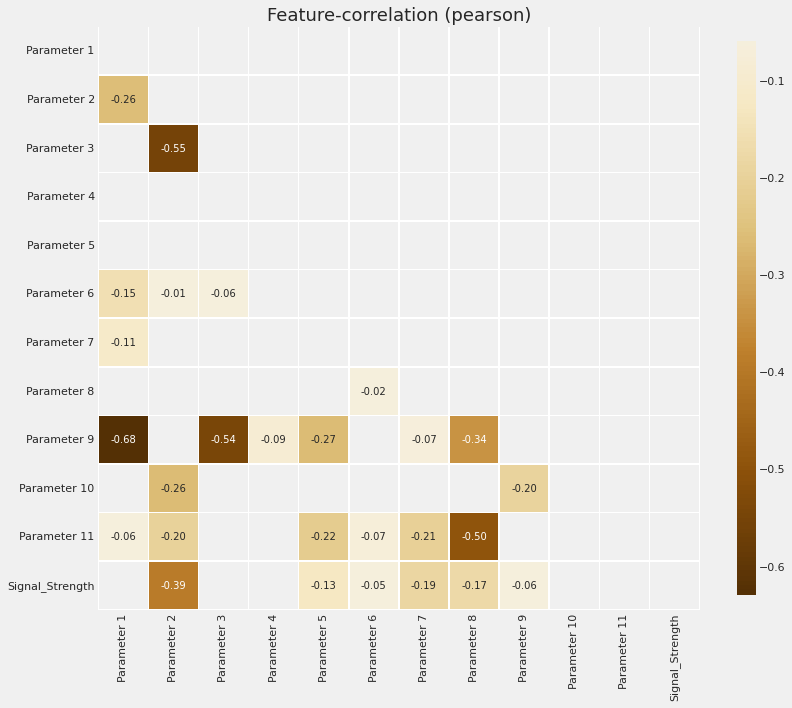

In [20]:
klib.corr_plot(data, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(data, split='neg') # displaying only negative correlations

##### No big Correlation between the features, which is a better sign meaning individul features contribute more  on the target instead of facing multicolinearity

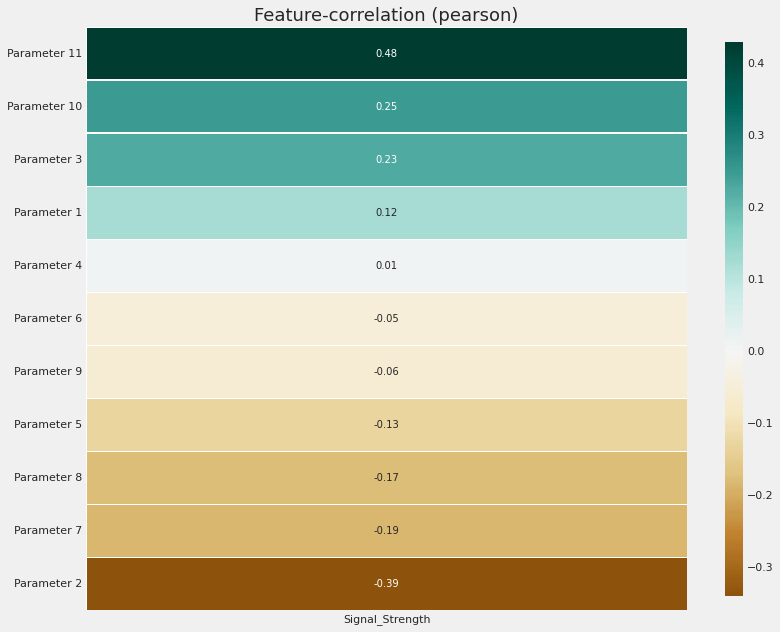

In [21]:
klib.corr_plot(data=data, target='Signal_Strength')

##### Parameters 10,11,3 contributes more to find the target values and on the otherhand parametes 2,7 contributes less to find the target values 

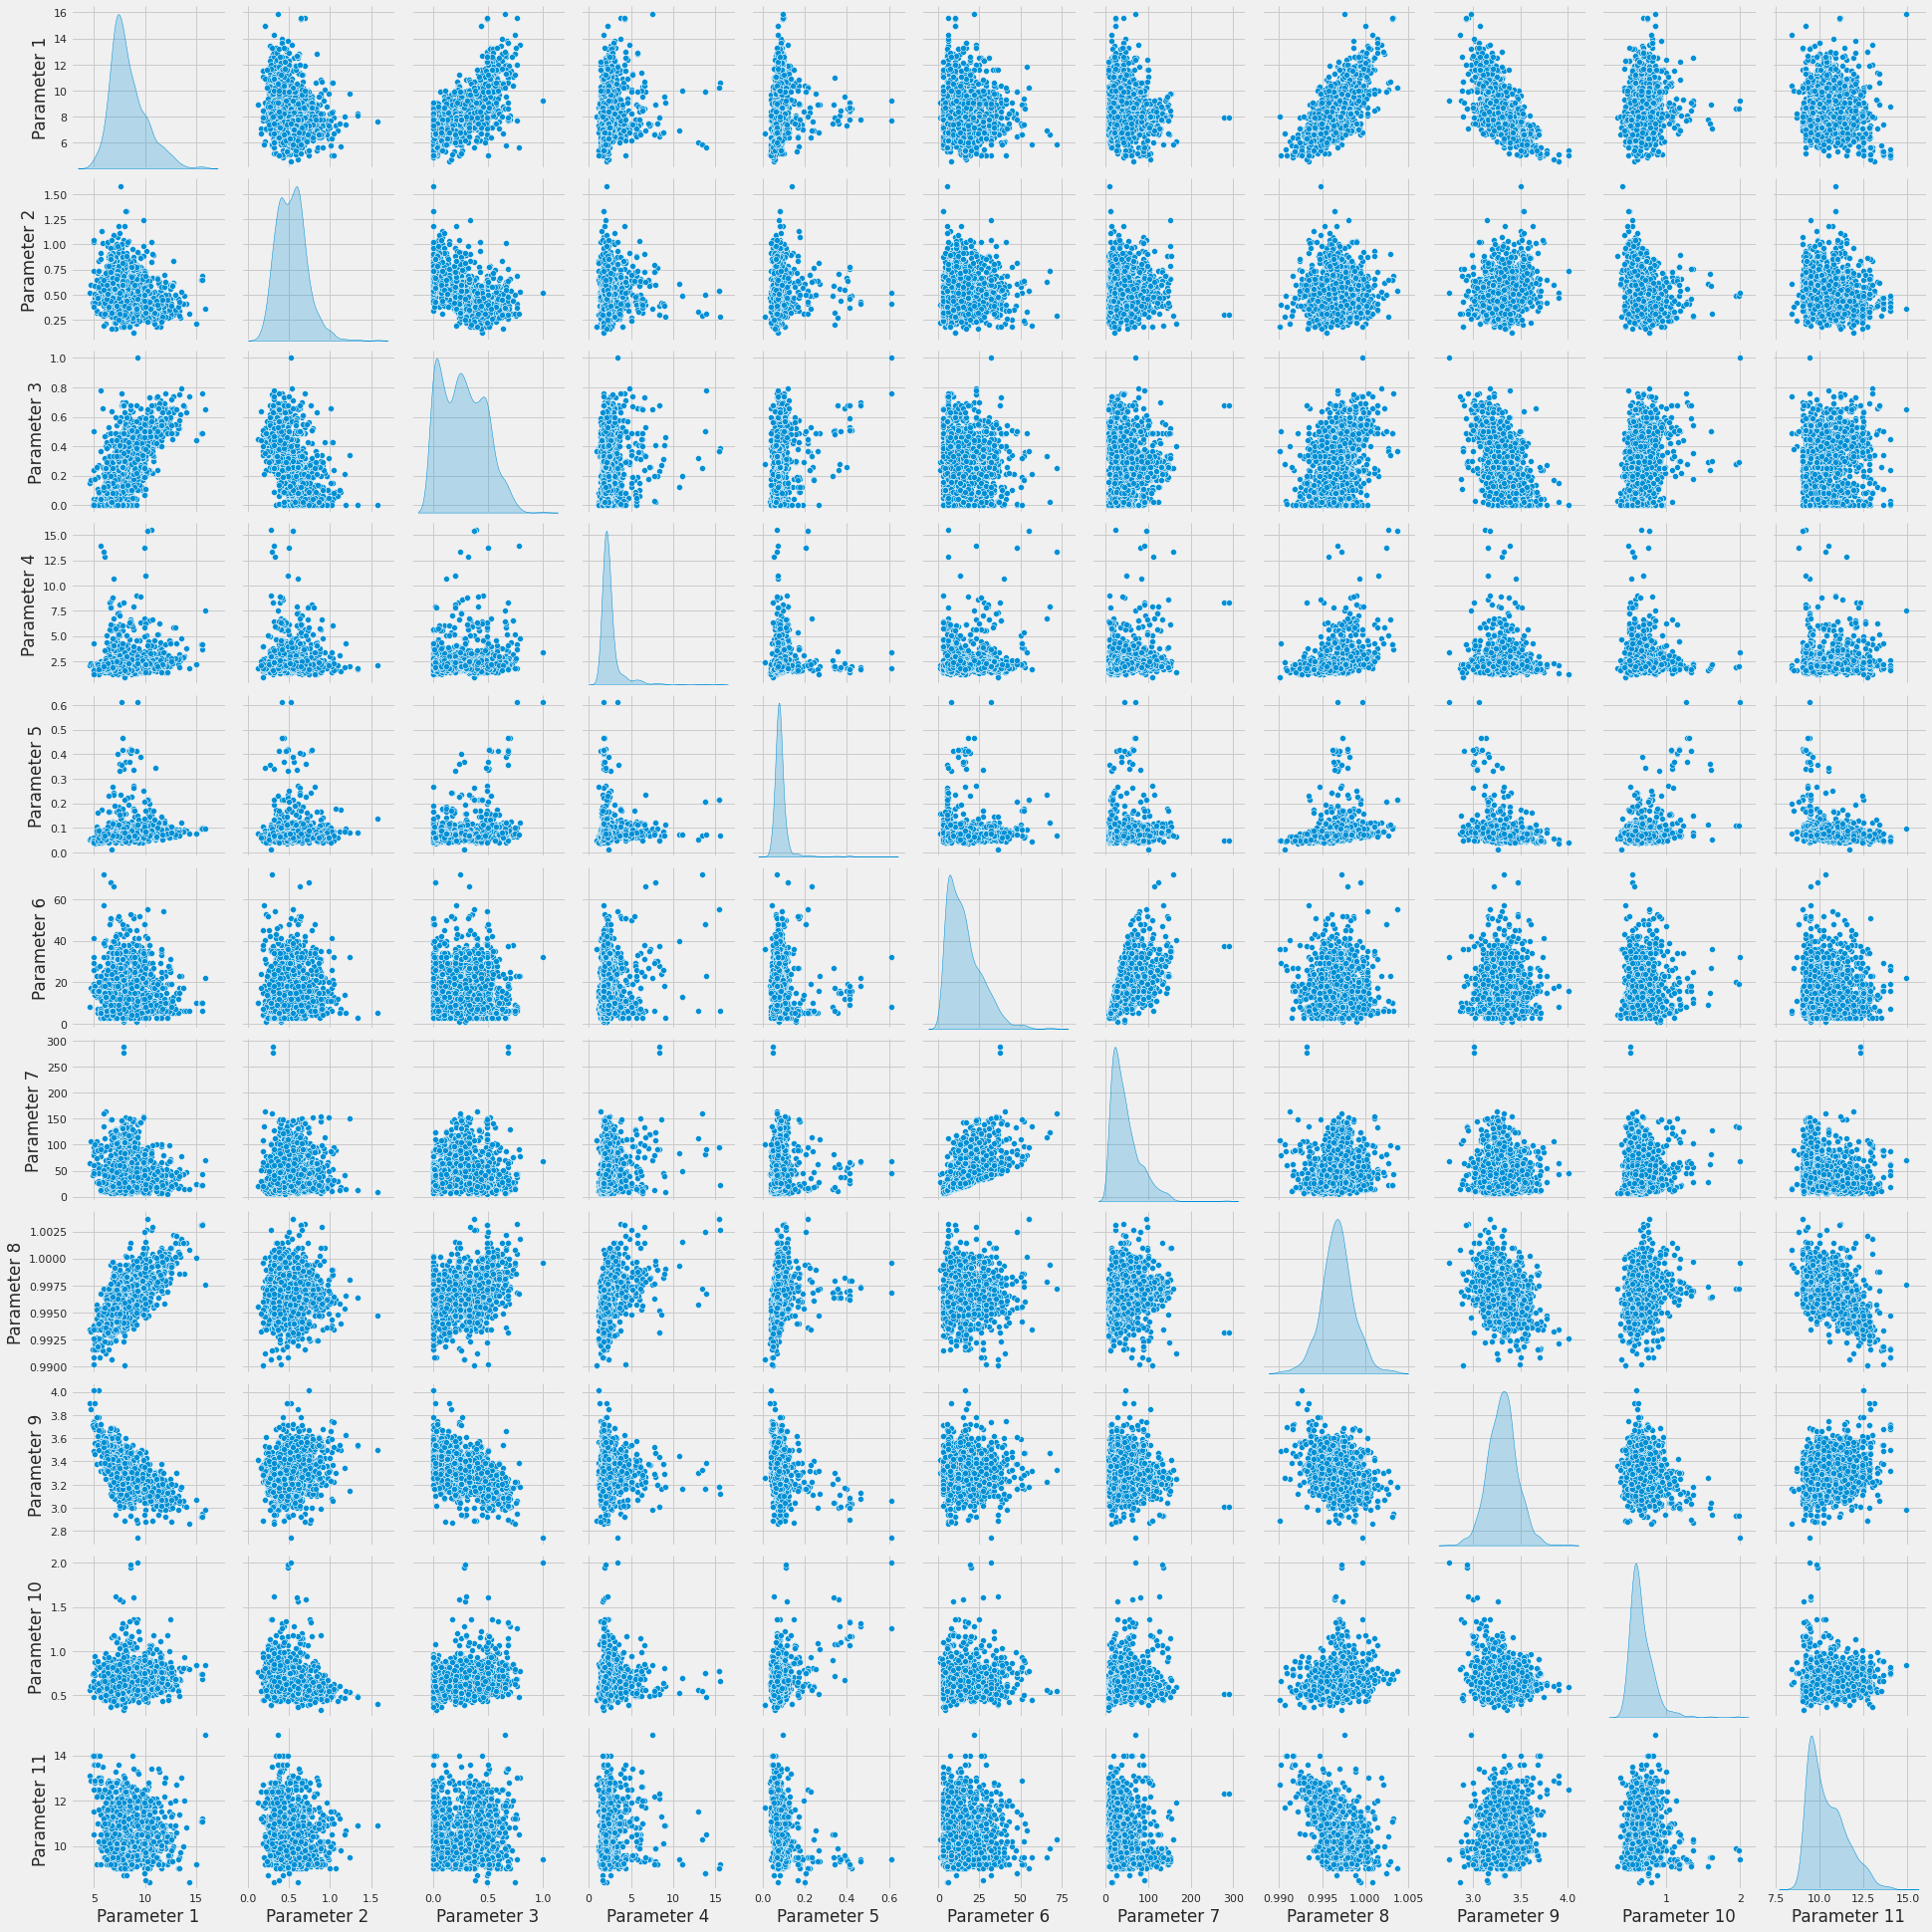

In [22]:
sns.pairplot(data=data.iloc[:,:-1],diag_kind='kde')

##### A complete picture of the data and their distribution.

### Data Analysis

In [23]:
num_cols=data.select_dtypes(include=['float64'])

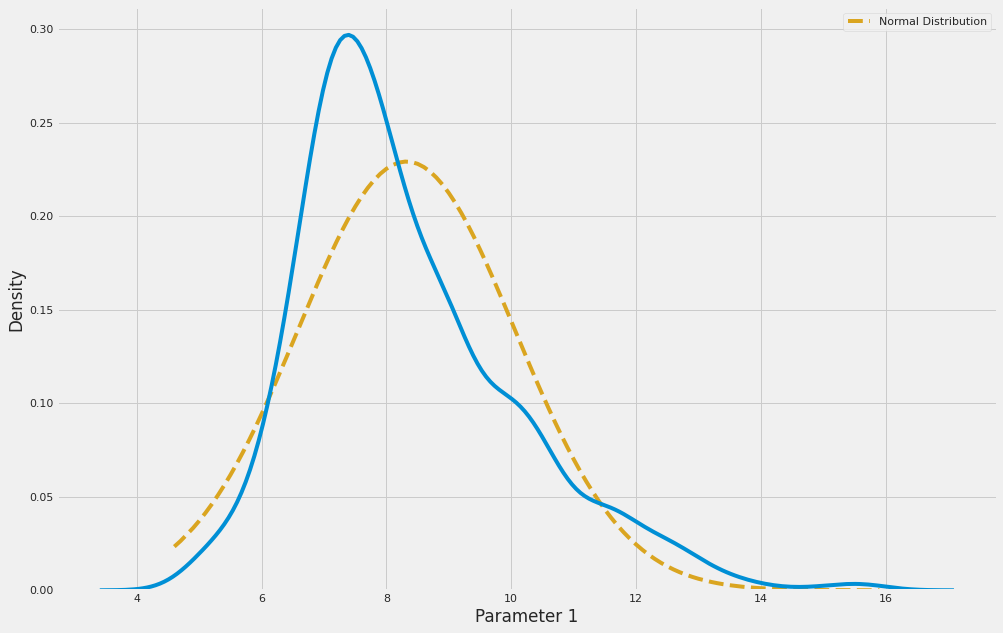

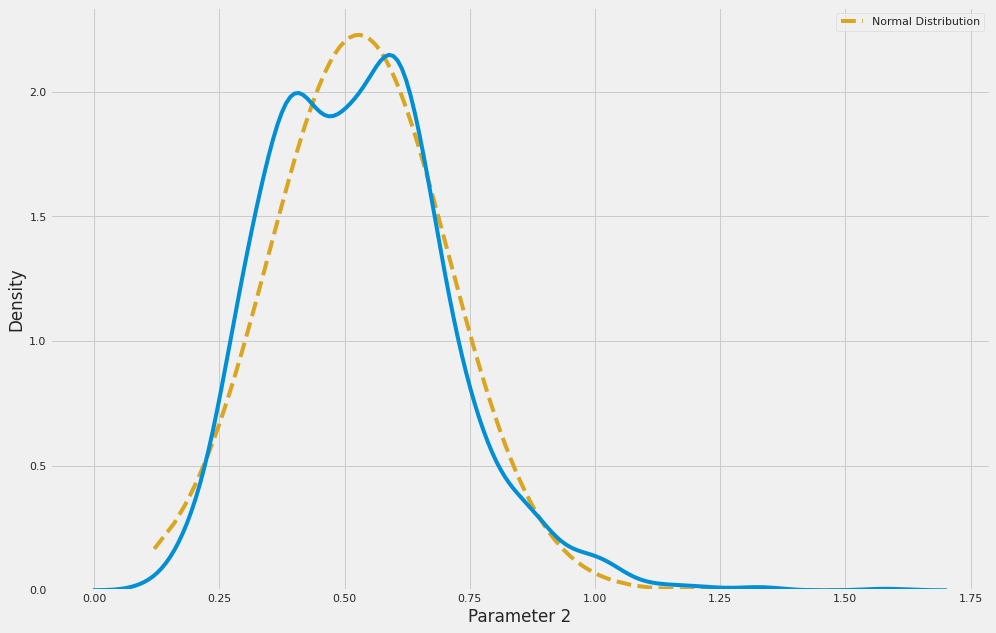

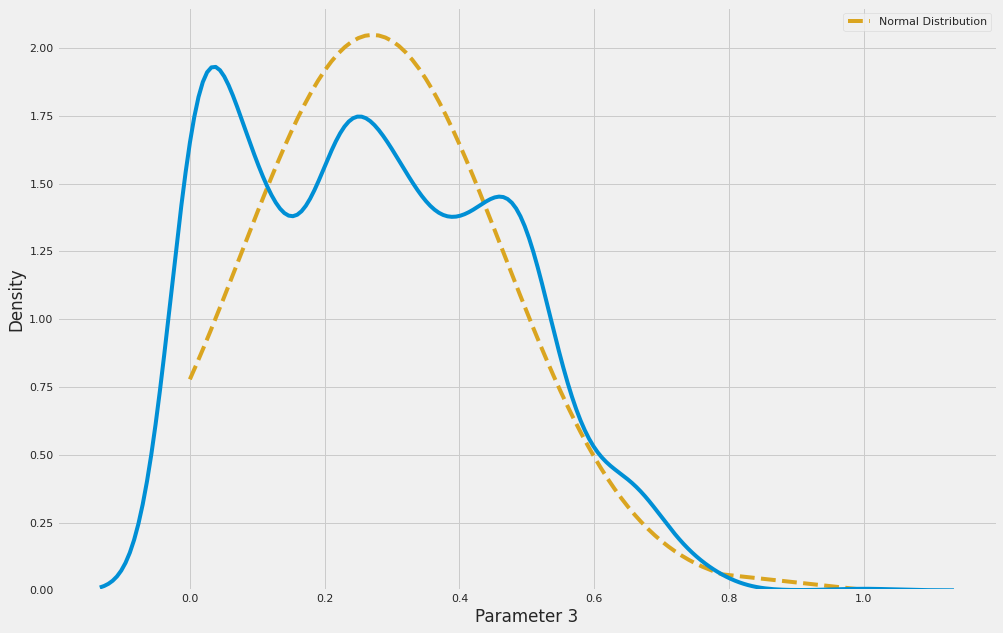

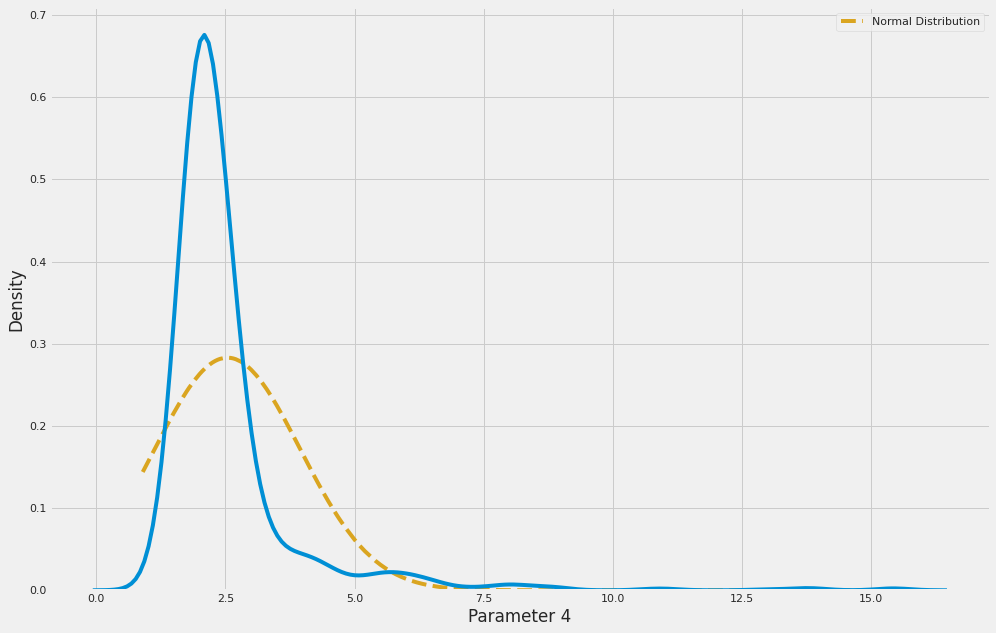

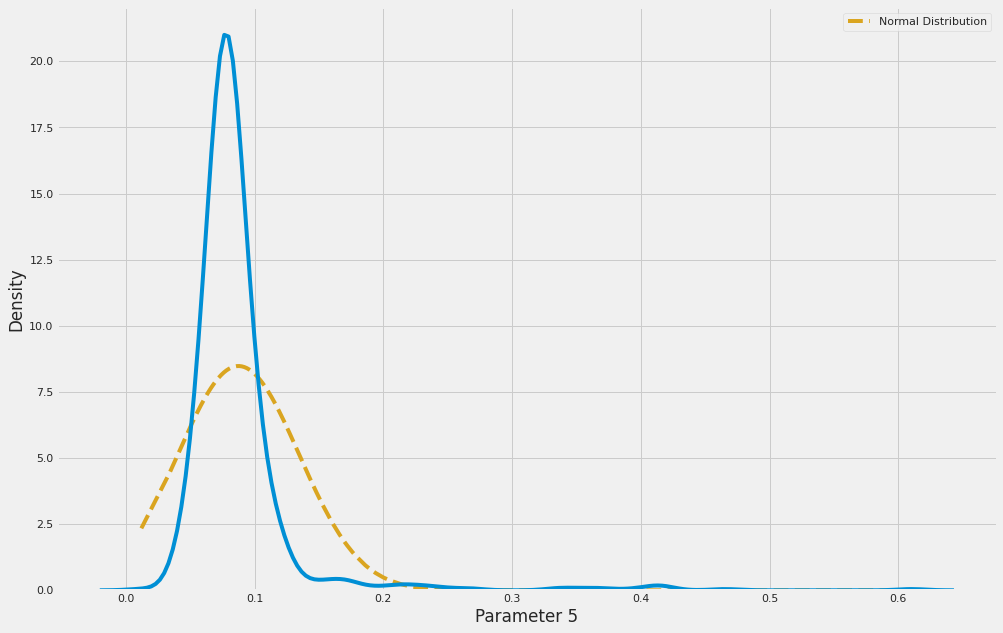

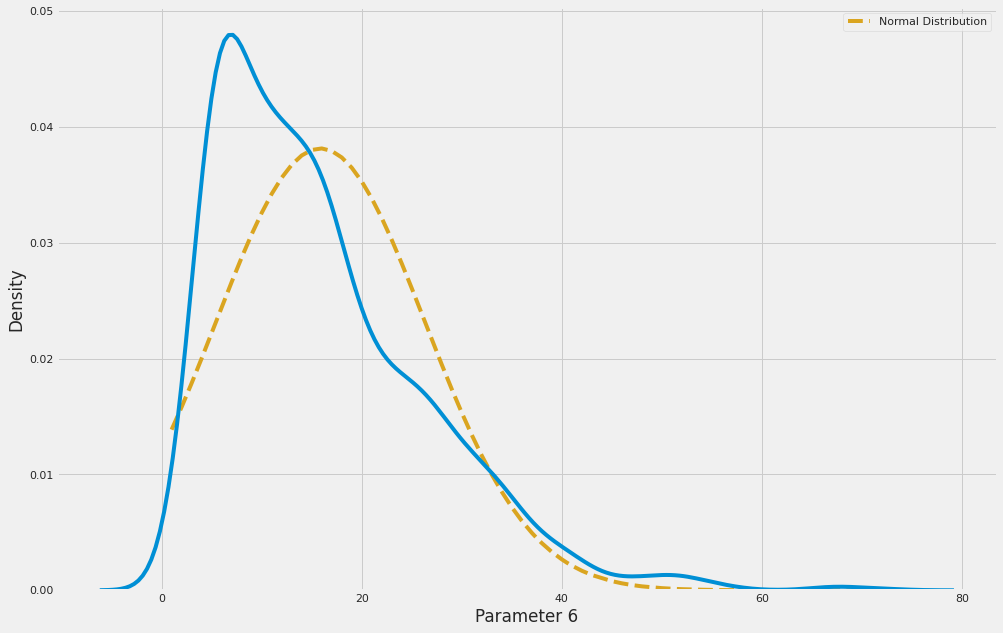

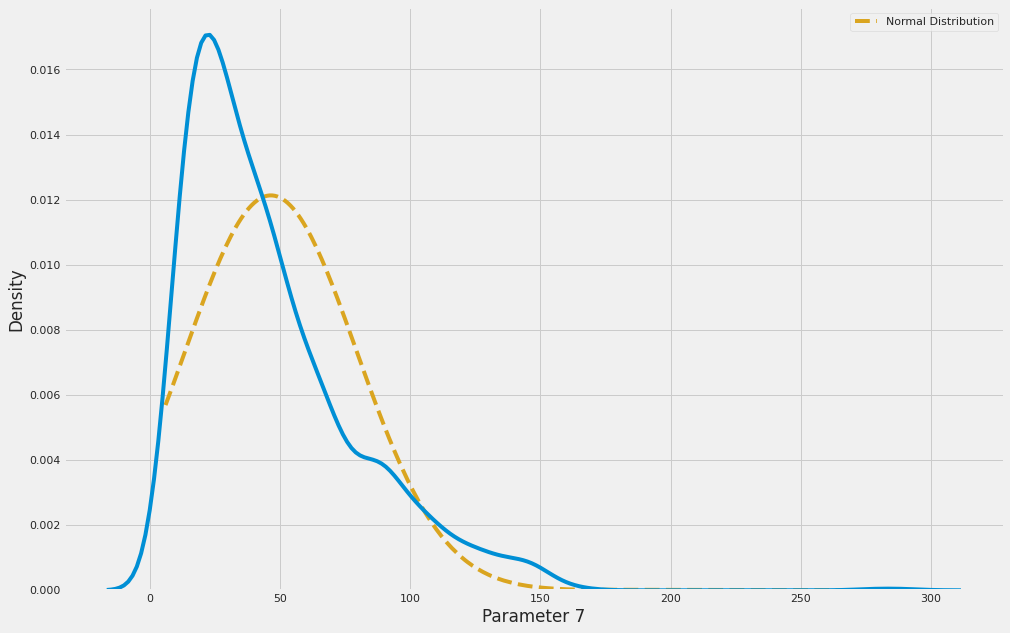

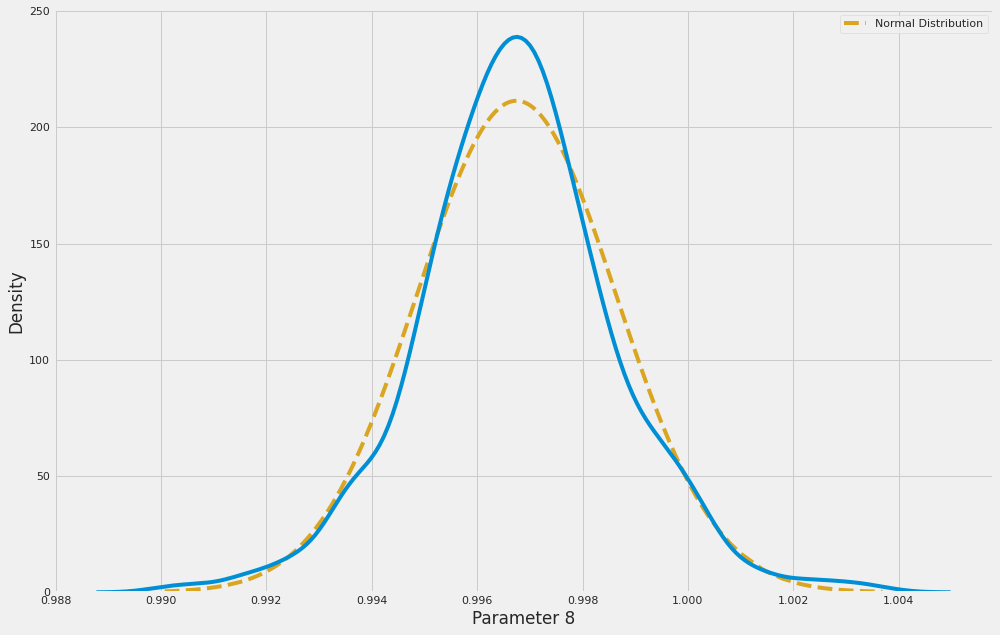

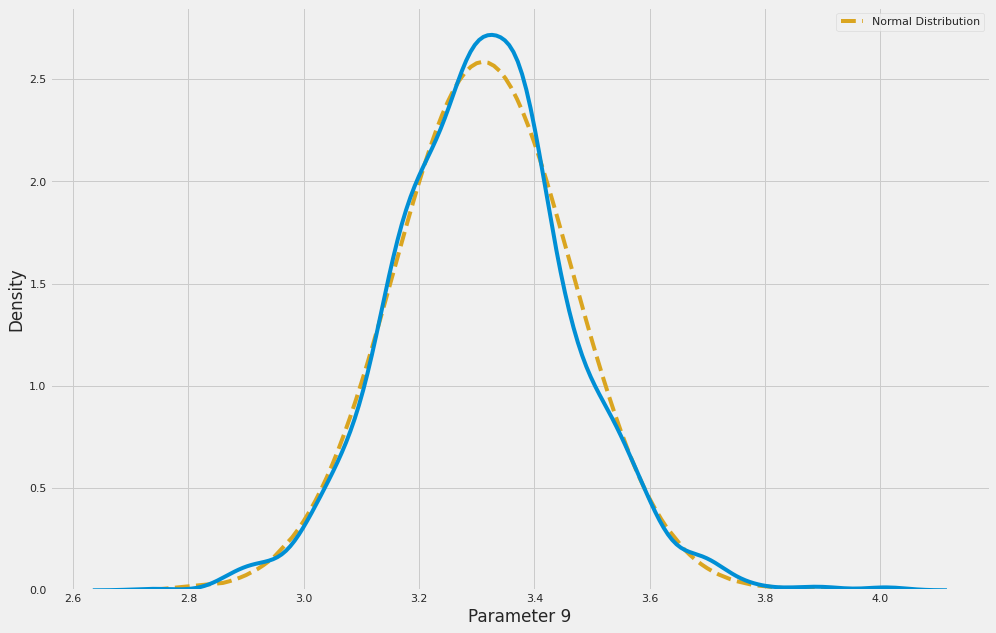

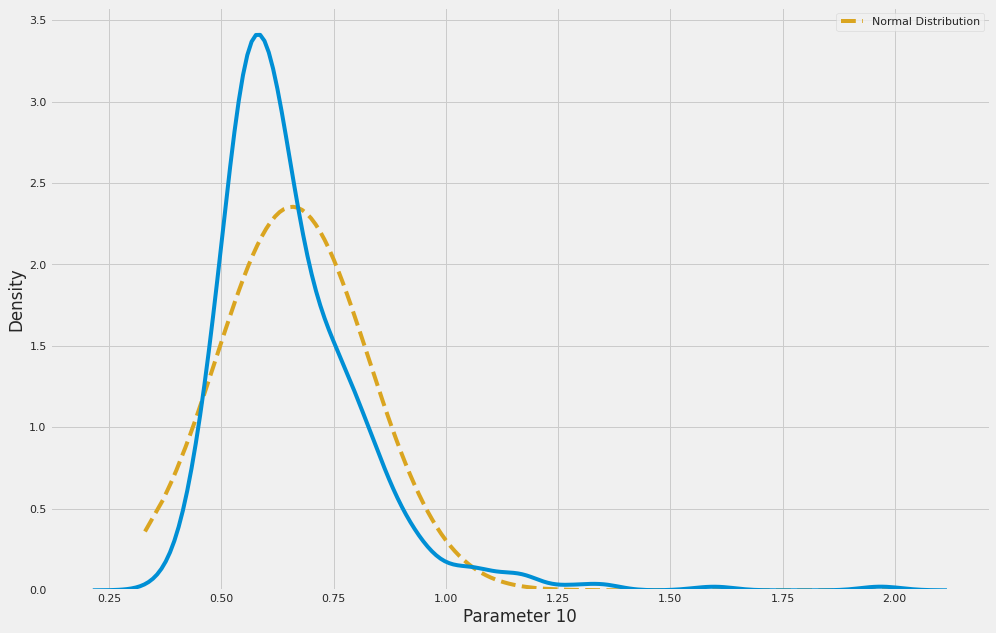

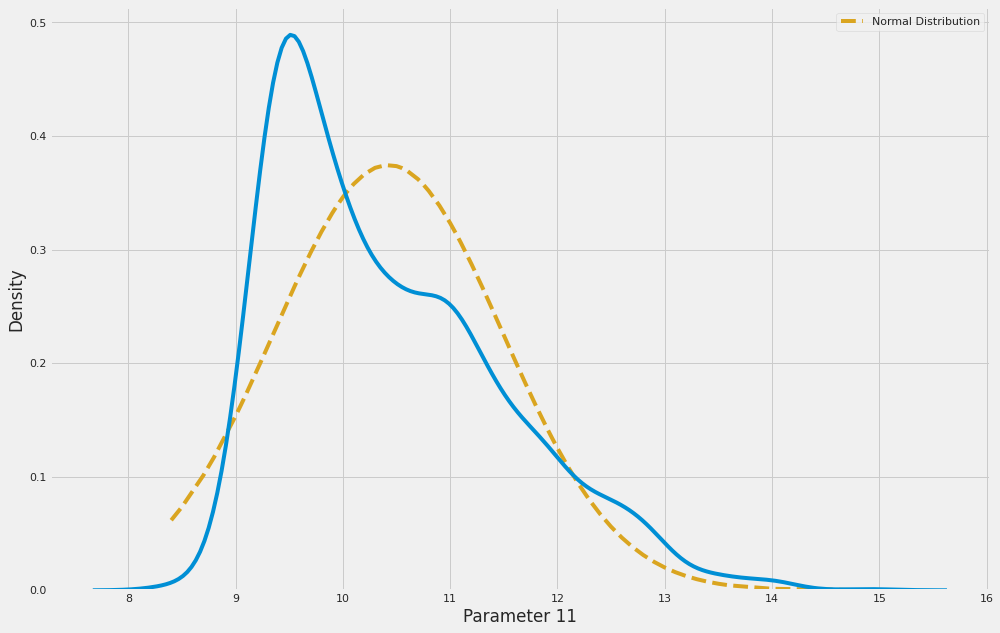

In [24]:
for i in num_cols:
  fit=np.array(data[i])
  fit=sorted(fit)
  val=stats.norm.pdf(fit,np.mean(fit),np.std(fit))
  plt.plot(fit,val,linestyle="--",color='goldenrod',label="Normal Distribution")
  sns.kdeplot(data[i])
  plt.legend()
  plt.show()

##### Again here we are withnessing the Normality check on each Parameter that how Normally Distributed they should have been  

In [25]:
Data=data.copy(deep=True)

### Spilitting Featues vs Target values

In [26]:
y=Data.iloc[:,-1]
x=Data.iloc[:,:-1]

##### Checking for Multicolinearity 

In [27]:
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Signal_Strength   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          1.79e-145
Time:                        10:52:21   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           21.9652     21.195      1.036      0.300     -19.607      63.538
Parameter 1      0.0250      0.026      0.963      0.336      -0.026       0.076
Parameter 2     -1.0836      0.121     -8.948      0.000      -1.321      -0.846
Parameter 3     -0.1826      0.147     -1.240      0.215      -0.471       0.106
Parameter 4      0.0163      0.015      1.089      0.276      -0.013       0.046
Parameter 5     -1.8742      0.419     -4.470      0.000      -2.697      -1.052
Parameter 6      0.0044      0.002      2.009      0.045       0.000       0.009
Parameter 7     -0.0033      0.001     -4.480      0.000      -0.005      -0.002
Parameter 8    -17.8812     21.633     -0.827      0.409     -60.314      24.551
Parameter 9     -0.4137      0.192     -2.159      0.031      -0.789      -0.038
Parameter 10     0.9163      0.114      8.014      0.000       0.692       1.141
Parameter 11     0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Scaling the data with the help of Power Transformer keeping that our dataset are hightly affected with kurtosis and  not in proper Scale, With PowerTransformer will provide the best scaling for the same

In [28]:
pt=PowerTransformer()
x_Transformed=pt.fit_transform(x)

In [29]:
x_Transformed=pd.DataFrame(x_Transformed,columns=x.columns)

In [30]:
X1=sm.add_constant(x_Transformed)
result=sm.OLS(y,X1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Signal_Strength   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     84.75
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          1.38e-150
Time:                        10:52:21   Log-Likelihood:                -1557.2
No. Observations:                1599   AIC:                             3138.
Df Residuals:                    1587   BIC:                             3203.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.6360      0.016    350.403      0.000       5.604       5.668
Parameter 1      0.1336      0.041      3.259      0.001       0.053       0.214
Parameter 2     -0.1836      0.022     -8.295      0.000      -0.227      -0.140
Parameter 3     -0.0654      0.027     -2.383      0.017      -0.119      -0.012
Parameter 4      0.0635      0.021      2.958      0.003       0.021       0.106
Parameter 5     -0.0652      0.019     -3.449      0.001      -0.102      -0.028
Parameter 6      0.0488      0.027      1.793      0.073      -0.005       0.102
Parameter 7     -0.0866      0.029     -3.007      0.003      -0.143      -0.030
Parameter 8     -0.1343      0.039     -3.417      0.001      -0.211      -0.057
Parameter 9     -0.0309      0.028     -1.093      0.275      -0.086       0.025
Parameter 10     0.2051      0.019     10.964      0.000       0.168       0.242
Parameter 11     0.2213      0.027      8.275      0.000       0.169       0.274
==============================================================================
Omnibus:                       30.096   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.685
Skew:                          -0.173   Prob(JB):                     7.29e-11
Kurtosis:                       3.762   Cond. No.                         6.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Now we can see form the your accuracy has increased and our multicolinearity issue is also been resolved by PowerTransformer 

In [31]:
df=pd.DataFrame()
df["Feature"]=x_Transformed.columns
df["VIF"]=[variance_inflation_factor(x_Transformed.values,i) for i in range(x.shape[1])] 
df["VIF"]=round(df["VIF"],2)
df=df.sort_values(by="VIF",ascending=False)
df

Feature   VIF
0    Parameter 1  6.50
7    Parameter 8  5.97
6    Parameter 7  3.20
8    Parameter 9  3.10
2    Parameter 3  2.91
5    Parameter 6  2.86
10  Parameter 11  2.77
1    Parameter 2  1.89
3    Parameter 4  1.78
4    Parameter 5  1.38
9   Parameter 10  1.35

##### Since your variation Inflation factor values are more toleratable we will not be dropping any values 

##### We spilit the data set into train and test  using Stratified KFold where we will be getting equal number of target values in the each data set we receive, Therefore baise of target will be supressed

In [33]:
Kfold=StratifiedKFold()
for train,test in Kfold.split(x_Transformed,y):
  X_train,X_test=x_Transformed.loc[train],x_Transformed.loc[test]
  y_train,y_test=y.loc[train],y.loc[test]

In [34]:
display(X_train.shape,X_test.shape)

(1280, 11)

(319, 11)

##### Checking where there is a deviation form the orginal dataset 

In [35]:
pval,stats=ttest_ind(X_train.all(),x_Transformed.all())
if pval<0.05:
    print("Values are different from the mean")
else:
    print("Values are not differnt from the mean ")

Values are not differnt from the mean 


In [36]:
pval,stats=ttest_ind(X_test.all(),x_Transformed.all())
if pval<0.05:
  print('Values are different from the mean')
else:
  print('Values are not different form the mean')

Values are not different form the mean


### Creating the model

##### Creating a model with Fully connect Dense layers with 2 layers , 1 hidden layers of 55 neurons and other for output with optimizer id SGD

In [37]:
model=Sequential()
model.add(Dense(55,activation='relu',input_dim=11))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='sgd',loss='mse')
model.fit(X_train,y_train,validation_split=0.3,batch_size=20,epochs=100)

Epoch 1/100
45/45 [==============================] - 2s 10ms/step - loss: 8.3869 - val_loss: 2.1950
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 1.1942 - val_loss: 1.3011
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 0.8436 - val_loss: 0.9712
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6864 - val_loss: 0.8378
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6120 - val_loss: 0.7233
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5478 - val_loss: 0.7032
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5106 - val_loss: 0.6393
Epoch 8/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4837 - val_loss: 0.5623
Epoch 9/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4585 - val_loss: 0.5526
Epoch 10/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4340 - val_loss: 0.5238
Epoch 11

In [38]:
yhat_m1=model.predict(X_test)
metrics.r2_score(y_test,yhat_m1)

0.37153168463522224

##### Model is performing well in terms of r2 score. But by fine tuning we migh reach good accuracy in future. Will try using differnt layers and will withness how does the model will perform 

##### Creating a model with BatchNormalization  layers with 2 layers , 1st BatchNormalizationand other for output with optimizer with SGD

In [39]:
model2=Sequential()
model2.add(BatchNormalization())
model2.add(Dense(1,activation='relu'))
model2.compile(optimizer='sgd',loss='mse')
model2.fit(X_train,y_train,validation_split=0.3,batch_size=20,epochs=100)

Epoch 1/100
45/45 [==============================] - 1s 7ms/step - loss: 8.0271 - val_loss: 1.7910
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 1.2771 - val_loss: 1.0432
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 0.8796 - val_loss: 0.8096
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.7088 - val_loss: 0.6957
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6393 - val_loss: 0.6302
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5851 - val_loss: 0.5843
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.5426 - val_loss: 0.5440
Epoch 8/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5303 - val_loss: 0.5235
Epoch 9/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4957 - val_loss: 0.5070
Epoch 10/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4898 - val_loss: 0.4937
Epoch 11/

In [40]:
yhat_m2=model2.predict(X_test)
metrics.r2_score(y_test,yhat_m2)

0.357472167009953

##### Similar to Dense layer model is preforming well but there is a slight deviation form the Dense layer, due to the update of  weights 

##### Creating a model with BatchNormalization layers &Dropout  with optimizer as SGD

In [41]:
model3=Sequential()
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(1,activation='relu'))
model3.compile(optimizer='sgd',loss='mse')
model3.fit(X_train,y_train,validation_split=0.3,batch_size=20,epochs=100)

Epoch 1/100
45/45 [==============================] - 1s 7ms/step - loss: 9.5164 - val_loss: 1.6707
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 2.1854 - val_loss: 0.9678
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 1.5377 - val_loss: 0.7273
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 1.2464 - val_loss: 0.6447
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 1.0582 - val_loss: 0.5861
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1026 - val_loss: 0.5518
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 0.9254 - val_loss: 0.5319
Epoch 8/100
45/45 [==============================] - 0s 3ms/step - loss: 0.9147 - val_loss: 0.5231
Epoch 9/100
45/45 [==============================] - 0s 3ms/step - loss: 0.8657 - val_loss: 0.5314
Epoch 10/100
45/45 [==============================] - 0s 3ms/step - loss: 0.8261 - val_loss: 0.5120
Epoch 11/

In [42]:
yhat_m3=model3.predict(X_test)
metrics.r2_score(y_test,yhat_m3)

0.34020290326660296

###### Model is losing the accuracy due to the Dropping of neurons and slow update of weights by BatchNormalisation 

##### Creating a model with all BatchNormalization ,Dropout & dense layers with optimizer as SGD

In [43]:
model4=Sequential()
model4.add(Dense(50,activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(1,activation='relu'))
model4.compile(optimizer='sgd',loss='mse')
model4.fit(X_train,y_train,validation_split=0.3,batch_size=20,epochs=100)

Epoch 1/100
45/45 [==============================] - 1s 6ms/step - loss: 11.4399 - val_loss: 1.3446
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 2.0214 - val_loss: 0.7654
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 1.3199 - val_loss: 0.6620
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 1.1364 - val_loss: 0.5551
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 1.0759 - val_loss: 0.6095
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.9398 - val_loss: 0.6008
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.8955 - val_loss: 0.5783
Epoch 8/100
45/45 [==============================] - 0s 3ms/step - loss: 0.8711 - val_loss: 0.6574
Epoch 9/100
45/45 [==============================] - 0s 3ms/step - loss: 0.7263 - val_loss: 0.5376
Epoch 10/100
45/45 [==============================] - 0s 3ms/step - loss: 0.7086 - val_loss: 0.5516
Epoch 11

In [44]:
yhat_m4=model4.predict(X_test)
metrics.r2_score(y_test,yhat_m4)

0.37919026496094643

##### Now we can see that the model has performed better after using all differnt layers in One go, Further we shall try how the model will perform in Multiple layers like the same 

In [45]:
model5=Sequential()
model5.add(Dense(50,activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(50,activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(1,activation='relu'))
model5.compile(optimizer='sgd',loss='mse')
model5.fit(X_train,y_train,validation_split=0.3,batch_size=20,epochs=100)

Epoch 1/100
45/45 [==============================] - 1s 8ms/step - loss: 11.9615 - val_loss: 4.2928
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 2.7924 - val_loss: 0.6871
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 1.6138 - val_loss: 0.9422
Epoch 4/100
45/45 [==============================] - 0s 5ms/step - loss: 1.3644 - val_loss: 0.9522
Epoch 5/100
45/45 [==============================] - 0s 6ms/step - loss: 1.0964 - val_loss: 0.6434
Epoch 6/100
45/45 [==============================] - 0s 5ms/step - loss: 0.9825 - val_loss: 0.6623
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.8930 - val_loss: 0.8399
Epoch 8/100
45/45 [==============================] - 0s 5ms/step - loss: 0.8535 - val_loss: 0.6999
Epoch 9/100
45/45 [==============================] - 0s 3ms/step - loss: 0.8368 - val_loss: 0.6068
Epoch 10/100
45/45 [==============================] - 0s 5ms/step - loss: 0.7412 - val_loss: 0.5452
Epoch 11

In [46]:
yhat_m5=model5.predict(X_test)
metrics.r2_score(y_test,yhat_m5)

0.3707056917787259

##### Model is performing like the same as individual layers  therefore will stick with them for better analysis

In [47]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.2,random_state=1)
#  Spilitting for validation 

### Hyper parameter tuning 

In [48]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 30
    output_nodes = 1

    model=Sequential()
    model.add(Dense(50,activation='relu',))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='relu',kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='mse', optimizer=sgd)
    early_stopping =EarlyStopping(patience=2)
    # Fit the model
    model.fit(X_val, y_val, epochs=iterations, batch_size=10, verbose= 1 ,validation_split=0.2,callbacks=[early_stopping])
    score = model.evaluate(X_val, y_val, verbose=0) 
    return score

In [49]:
lr = 0.00001
Lambda = 0
train_and_test_loop(100, lr, Lambda)

Epoch 1/100
21/21 [==============================] - 1s 16ms/step - loss: 25.2686 - val_loss: 29.3186
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 25.5625 - val_loss: 29.5950
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 25.2067 - val_loss: 29.6940


29.327232360839844

##### As we could see that by using low lamda value the loss is high and very low learning rate converges very slow

In [50]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 50, best_acc, lr, Lambda))

Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 20.2121 - val_loss: 20.6522
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 11.9868 - val_loss: 13.1574
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 8.0652 - val_loss: 8.5564
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 7.0456 - val_loss: 4.7265
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 4.5231 - val_loss: 1.5570
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 2.1135 - val_loss: 0.6703
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 1.7568 - val_loss: 0.7619
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 1.0018 - val_loss: 0.6938
Try 1/50: Best_val_acc: 0.6291748881340027, lr: 0.0009597467873902389, Lambda: 0.007634320274728748

Epoch 1/100
21/21 [==============================] - 1s 14ms/step - loss: 14.4870 - val_loss: 301.1108

##### Seems that model performs well between (-6.0, 1.0) in learning rate will double check 

In [52]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-6.0, 1.0))
    Lambda = math.pow(10, np.random.uniform(-5,-1))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 50, best_acc, lr, Lambda))

Epoch 1/100
21/21 [==============================] - 3s 29ms/step - loss: 25.0968 - val_loss: 31.9159
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 25.1225 - val_loss: 31.0055
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 25.6359 - val_loss: 30.0442
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 25.8463 - val_loss: 29.2299
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 25.3795 - val_loss: 28.3625
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 25.5981 - val_loss: 27.4953
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 24.5049 - val_loss: 26.7525
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 25.4903 - val_loss: 26.0837
Epoch 9/100
21/21 [==============================] - 0s 6ms/step - loss: 25.4467 - val_loss: 25.4961
Epoch 10/100
21/21 [==============================] - 0s 8ms/step - loss: 25.3939 - val_lo

In [54]:
# further colsing the values for good parameters
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-4.0, 0.0))
    Lambda = math.pow(10, np.random.uniform(-6,-2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 50, best_acc, lr, Lambda))

Epoch 1/100
21/21 [==============================] - 2s 19ms/step - loss: 23.8086 - val_loss: 26.1611
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 18.5653 - val_loss: 20.0017
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 14.5104 - val_loss: 14.5394
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 11.4719 - val_loss: 10.7855
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 10.0061 - val_loss: 8.4076
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 9.2862 - val_loss: 6.5042
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 8.1412 - val_loss: 5.9050
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 7.0145 - val_loss: 5.2863
Epoch 9/100
21/21 [==============================] - 0s 7ms/step - loss: 6.9366 - val_loss: 4.4114
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - loss: 5.3171 - val_loss: 3.7247

##### Finally the lr:0.0275104999848881 & Lamda:0.003554857

In [57]:
model=Sequential()
model.add(Dense(50,activation='relu',))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation='relu',kernel_regularizer=regularizers.l2(0.0035548572349841582)))
    
sgd = optimizers.SGD(lr=0.0275104999848881, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='mse', optimizer=sgd)
early_stopping =EarlyStopping(patience=10)
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose= 1 ,validation_data=(X_val,y_val),callbacks=[early_stopping])
score = model.evaluate(X_test, y_test, verbose=0) 

Epoch 1/100
103/103 [==============================] - 3s 9ms/step - loss: 5.2751 - val_loss: 0.6137
Epoch 2/100
103/103 [==============================] - 1s 6ms/step - loss: 0.6206 - val_loss: 0.5128
Epoch 3/100
103/103 [==============================] - 1s 6ms/step - loss: 0.5329 - val_loss: 0.5777
Epoch 4/100
103/103 [==============================] - 1s 6ms/step - loss: 0.5514 - val_loss: 0.5346
Epoch 5/100
103/103 [==============================] - 1s 7ms/step - loss: 0.5479 - val_loss: 0.5511
Epoch 6/100
103/103 [==============================] - 1s 7ms/step - loss: 0.5331 - val_loss: 0.4688
Epoch 7/100
103/103 [==============================] - 1s 5ms/step - loss: 0.5133 - val_loss: 0.4474
Epoch 8/100
103/103 [==============================] - 1s 5ms/step - loss: 0.5198 - val_loss: 0.5532
Epoch 9/100
103/103 [==============================] - 1s 6ms/step - loss: 0.4903 - val_loss: 0.4929
Epoch 10/100
103/103 [==============================] - 0s 4ms/step - loss: 0.5000 - val_lo

##### . Pickle the model for future use.

In [6]:
model.save("model.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [4]:
# load the model
model= load_model('model.h5')

In [58]:
yhat_final=model.predict(X_test)

In [59]:
metrics.r2_score(y_test,yhat_final)

0.3145341583026229

##### Model has performed well with the entire train and test datasets 

In [62]:
y_test[:5]

1133    7
1134    7
1147    7
1150    7
1156    7
Name: Signal_Strength, dtype: int64

In [63]:
yhat_final[:5]

array([[5.893792 ],
       [6.285674 ],
       [5.8254123],
       [6.42088  ],
       [5.8814692]], dtype=float32)

### DOMAIN: 
    Autonomous Vehicles

### BUSINESS CONTEXT: 
    A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic
example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic
images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address
helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest
to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This
difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character
arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain
some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

### DATA DESCRIPTION:
The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on
data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained
from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files

### • PROJECT OBJECTIVE:
    We will build a digit classifier on the SVHN (Street View Housing Number) dataset

### Part B

### Import the data

In [ ]:
h5_SVH = h5py.File('/content/drive/MyDrive/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

# Load the training, validation and test sets
X_train = h5_SVH['X_train'][:]
y_train = h5_SVH['y_train'][:]
X_val = h5_SVH['X_val'][:]
y_val = h5_SVH['y_val'][:]
X_test = h5_SVH['X_test'][:]
y_test = h5_SVH['y_test'][:]
h5_SVH.close()

In [ ]:
print("Shape of the Train dataset: ",X_train.shape)
print("Shape of the Validation  dataset: ",X_val.shape)
print("Shape of the Test dataset: ",X_test.shape)

Shape of the Train dataset:  (42000, 32, 32)
Shape of the Validation  dataset:  (60000, 32, 32)
Shape of the Test dataset:  (18000, 32, 32)


In [ ]:
print("Shape of the O/p Train dataset: ",y_train.shape)
print("Shape of the O/p Validation  dataset: ",y_val.shape)
print("Shape of the O/p Test dataset: ",y_test.shape)

Shape of the O/p Train dataset:  (42000,)
Shape of the O/p Validation  dataset:  (60000,)
Shape of the O/p Test dataset:  (18000,)


##### Data pre-processing and visualisation.

##### Printing the 1st 10 images

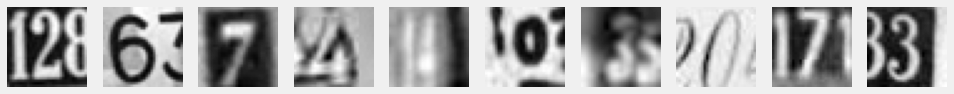

Labels of first 10 rows:  [2 6 7 4 4 0 3 0 7 3]


In [ ]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
plt.show()
print('Labels of first 10 rows: ',y_train[0:10])

In [ ]:
display(np.unique(y_train)
,np.unique(y_val)
,np.unique(y_test))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
X_train=X_train.reshape((X_train.shape[0],-1))
X_val=X_val.reshape((X_val.shape[0],-1))
X_test=X_test.reshape((X_test.shape[0],-1))

In [ ]:
print("Shape of the Train dataset: ",X_train.shape)
print("Shape of the Validation  dataset: ",X_val.shape)
print("Shape of the Test dataset: ",X_test.shape)

Shape of the Train dataset:  (42000, 1024)
Shape of the Validation  dataset:  (60000, 1024)
Shape of the Test dataset:  (18000, 1024)


##### Normalizing the RGB codes by dividing it to the max RGB value

In [ ]:
X_train /= 255
X_val /= 255
X_test /= 255

In [ ]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

##### Converting y data into categorical (one-hot encoding)

In [ ]:
y_train=to_categorical(y_train,num_classes=10)
y_val=to_categorical(y_val,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
print("Shape of the O/p Train dataset: ",y_train.shape)
print("Shape of the O/p Validation  dataset: ",y_val.shape)
print("Shape of the O/p Test dataset: ",y_test.shape)

Shape of the O/p Train dataset:  (42000, 10)
Shape of the O/p Validation  dataset:  (60000, 10)
Shape of the O/p Test dataset:  (18000, 10)


### Creating the model 

In [ ]:
X_val,X_sub,y_val,y_sub=train_test_split(X_val,y_val,test_size=0.2,random_state=42)

### Modelling - Baby sitting the learning process

In [ ]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 300
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_sub, y_sub, epochs=iterations, batch_size=300, verbose= 1)
    score = model.evaluate(X_sub, y_sub, verbose=0)
    
    return score

##### Check that the loss is reasonable by different values of Lambda and learning values

In [ ]:
lr = 0.00001
Lambda = 0
train_and_test_loop(10, lr, Lambda)

Epoch 1/10
12/12 [==============================] - 1s 40ms/step - loss: 2.4151 - accuracy: 0.0997
Epoch 2/10
12/12 [==============================] - 0s 40ms/step - loss: 2.4124 - accuracy: 0.1003
Epoch 3/10
12/12 [==============================] - 0s 39ms/step - loss: 2.4087 - accuracy: 0.1004
Epoch 4/10
12/12 [==============================] - 0s 38ms/step - loss: 2.4049 - accuracy: 0.0998
Epoch 5/10
12/12 [==============================] - 0s 38ms/step - loss: 2.4012 - accuracy: 0.1004
Epoch 6/10
12/12 [==============================] - 0s 38ms/step - loss: 2.3977 - accuracy: 0.0999
Epoch 7/10
12/12 [==============================] - 0s 39ms/step - loss: 2.3943 - accuracy: 0.0987
Epoch 8/10
12/12 [==============================] - 0s 38ms/step - loss: 2.3910 - accuracy: 0.0988
Epoch 9/10
12/12 [==============================] - 0s 37ms/step - loss: 2.3878 - accuracy: 0.0984
Epoch 10/10
12/12 [==============================] - 0s 36ms/step - loss: 2.3847 - accuracy: 0.0993


[2.383185386657715, 0.09858333319425583]

In [ ]:
lr = 0.01
Lambda =  0
train_and_test_loop(10, lr, Lambda)

Epoch 1/10
12/12 [==============================] - 1s 39ms/step - loss: 2.3266 - accuracy: 0.1000
Epoch 2/10
12/12 [==============================] - 0s 37ms/step - loss: 2.3017 - accuracy: 0.1163
Epoch 3/10
12/12 [==============================] - 0s 38ms/step - loss: 2.2917 - accuracy: 0.1319
Epoch 4/10
12/12 [==============================] - 0s 38ms/step - loss: 2.2842 - accuracy: 0.1586
Epoch 5/10
12/12 [==============================] - 0s 39ms/step - loss: 2.2782 - accuracy: 0.1529
Epoch 6/10
12/12 [==============================] - 0s 37ms/step - loss: 2.2712 - accuracy: 0.1963
Epoch 7/10
12/12 [==============================] - 0s 38ms/step - loss: 2.2641 - accuracy: 0.2048
Epoch 8/10
12/12 [==============================] - 0s 37ms/step - loss: 2.2548 - accuracy: 0.2291
Epoch 9/10
12/12 [==============================] - 0s 38ms/step - loss: 2.2460 - accuracy: 0.2548
Epoch 10/10
12/12 [==============================] - 0s 39ms/step - loss: 2.2370 - accuracy: 0.2309


[2.232039451599121, 0.25075000524520874]

##### Now lets try using differnt values and will see how the model will perform accordingly

In [ ]:
lr = 0.01
Lambda =  0
train_and_test_loop(100, lr, Lambda)

Epoch 1/100
12/12 [==============================] - 1s 40ms/step - loss: 2.3237 - accuracy: 0.1106
Epoch 2/100
12/12 [==============================] - 0s 40ms/step - loss: 2.2977 - accuracy: 0.1175
Epoch 3/100
12/12 [==============================] - 0s 39ms/step - loss: 2.2887 - accuracy: 0.1408
Epoch 4/100
12/12 [==============================] - 0s 38ms/step - loss: 2.2804 - accuracy: 0.1482
Epoch 5/100
12/12 [==============================] - 0s 39ms/step - loss: 2.2708 - accuracy: 0.1803
Epoch 6/100
12/12 [==============================] - 0s 39ms/step - loss: 2.2632 - accuracy: 0.2053
Epoch 7/100
12/12 [==============================] - 0s 38ms/step - loss: 2.2543 - accuracy: 0.2192
Epoch 8/100
12/12 [==============================] - 0s 38ms/step - loss: 2.2455 - accuracy: 0.2320
Epoch 9/100
12/12 [==============================] - 0s 38ms/step - loss: 2.2362 - accuracy: 0.2465
Epoch 10/100
12/12 [==============================] - 0s 37ms/step - loss: 2.2239 - accuracy: 0.2658

[0.7938156723976135, 0.7562500238418579]

##### AS we reduce the learning rate as low as possible the model takes a long time to adapt and takes time to reduce the losses

In [ ]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
40/40 [==============================] - 1s 14ms/step - loss: 2.3685 - accuracy: 0.0950
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 2.3685 - accuracy: 0.0952
Epoch 3/20
40/40 [==============================] - 1s 14ms/step - loss: 2.3684 - accuracy: 0.0952
Epoch 4/20
40/40 [==============================] - 1s 14ms/step - loss: 2.3683 - accuracy: 0.0953
Epoch 5/20
40/40 [==============================] - 1s 14ms/step - loss: 2.3682 - accuracy: 0.0953
Epoch 6/20
40/40 [==============================] - 1s 14ms/step - loss: 2.3682 - accuracy: 0.0953
Epoch 7/20
40/40 [==============================] - 1s 14ms/step - loss: 2.3681 - accuracy: 0.0953
Epoch 8/20
40/40 [==============================] - 1s 14ms/step - loss: 2.3680 - accuracy: 0.0953
Epoch 9/20
40/40 [==============================] - 1s 14ms/step - loss: 2.3679 - accuracy: 0.0953
Epoch 10/20
40/40 [==============================] - 1s 14ms/step - loss: 2.3678 - accuracy: 0.0953
Epoch 11/

[2.3670496940612793, 0.09549999982118607]

##### Lets check for differnt values of Lr and Lambda untill we find the best parameters

In [ ]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop(100, lr, Lambda)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 50, best_acc, lr, Lambda))

Epoch 1/100
40/40 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0995
Epoch 2/100
40/40 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0991
Epoch 3/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 4/100
40/40 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0991
Epoch 5/100
40/40 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0991
Epoch 6/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 7/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 8/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 9/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 10/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 11/100
40/40 [=========

In [ ]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-5.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-6,-1))
    best_acc = train_and_test_loop(100, lr, Lambda)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 50, best_acc, lr, Lambda))

Epoch 1/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0978
Epoch 2/100
40/40 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0991
Epoch 3/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 4/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 5/100
40/40 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0991
Epoch 6/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 7/100
40/40 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0991
Epoch 8/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 9/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 10/100
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0991
Epoch 11/100
40/40 [=========

In [ ]:
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-2.0, 0))
    Lambda = math.pow(10, np.random.uniform(-3,-1))
    best_acc = train_and_test_loop(100, lr, Lambda)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 50, best_acc, lr, Lambda))

Epoch 1/100
40/40 [==============================] - 1s 14ms/step - loss: 2.3653 - accuracy: 0.0997
Epoch 2/100
40/40 [==============================] - 1s 14ms/step - loss: 2.2950 - accuracy: 0.1411
Epoch 3/100
40/40 [==============================] - 1s 13ms/step - loss: 2.2738 - accuracy: 0.1377
Epoch 4/100
40/40 [==============================] - 1s 14ms/step - loss: 2.2875 - accuracy: 0.1242
Epoch 5/100
40/40 [==============================] - 1s 13ms/step - loss: 2.2773 - accuracy: 0.1230
Epoch 6/100
40/40 [==============================] - 1s 14ms/step - loss: 2.2960 - accuracy: 0.1086
Epoch 7/100
40/40 [==============================] - 1s 13ms/step - loss: 2.2980 - accuracy: 0.1123
Epoch 8/100
40/40 [==============================] - 1s 14ms/step - loss: 2.2739 - accuracy: 0.1173
Epoch 9/100
40/40 [==============================] - 1s 14ms/step - loss: 2.3067 - accuracy: 0.1032
Epoch 10/100
40/40 [==============================] - 1s 14ms/step - loss: 2.2966 - accuracy: 0.1116

##### Best_val_acc: [0.809853196144104, 0.7919166684150696], lr: 0.012364718653616111, Lambda: 0.021667682987876805

##### Checking with the best parameters

In [ ]:
lr = 0.01
Lambda =  0.02
train_and_test_loop(100, lr, Lambda)

Epoch 1/100
40/40 [==============================] - 1s 15ms/step - loss: 2.6687 - accuracy: 0.1082
Epoch 2/100
40/40 [==============================] - 1s 14ms/step - loss: 2.5441 - accuracy: 0.1338
Epoch 3/100
40/40 [==============================] - 1s 15ms/step - loss: 2.4587 - accuracy: 0.1698
Epoch 4/100
40/40 [==============================] - 1s 15ms/step - loss: 2.3977 - accuracy: 0.1952
Epoch 5/100
40/40 [==============================] - 1s 14ms/step - loss: 2.3502 - accuracy: 0.2578
Epoch 6/100
40/40 [==============================] - 1s 14ms/step - loss: 2.3113 - accuracy: 0.2721
Epoch 7/100
40/40 [==============================] - 1s 15ms/step - loss: 2.2725 - accuracy: 0.3065
Epoch 8/100
40/40 [==============================] - 1s 15ms/step - loss: 2.2314 - accuracy: 0.3398
Epoch 9/100
40/40 [==============================] - 1s 14ms/step - loss: 2.1850 - accuracy: 0.3374
Epoch 10/100
40/40 [==============================] - 1s 15ms/step - loss: 2.1260 - accuracy: 0.3728

[0.9212056994438171, 0.7494999766349792]

##### Now we well find what is the best number of neurons can be used in the model and again will check the learning rate with the help of keras-tuner

##### keras_tuner:The Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your TensorFlow program. 

In [ ]:
def build_model1(hp):       
    model =  Sequential()
    
    for layer in range(hp.Int('layers',2,5)):
      model.add(Dense(units = hp.Int('num_of_neurons' + str(layer),
                                     min_value=20,
                                     max_value=512,
                                     step=32),
                      input_shape=(1024,),
                      activation = hp.Choice('act_' + str(layer),['relu'])))
    
    #output layer
    model.add(Dense(300,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    #compiling the model
    model.compile(optimizer=keras.optimizers.SGD(hp.Choice('learning_rate',values=[1e-1,1e-2, 1e-3,])),
                  loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
tuner1 = RandomSearch(build_model1,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner1.search_space_summary()

Search space summary
Default search space size: 12
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': None}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 32, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 32, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
learning_rate (Choice)
{'default': 0.0123, 'conditions': [], 'values': [0.0123], 'ordered': True}
num_of_neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 32, 'sampling': None}
act_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
num_of_neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step'

In [ ]:
tuner1.search(X_train,
             y_train,
             epochs = 5,
             validation_data=(X_val,y_val))

Trial 6 Complete [00h 03m 47s]
val_accuracy: 0.6151458422342936

Best val_accuracy So Far: 0.6151458422342936
Total elapsed time: 00h 03m 47s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner1.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
layers: 4
num_of_neurons0: 212
act_0: relu
num_of_neurons1: 500
act_1: relu
learning_rate: 0.0123
num_of_neurons2: 116
act_2: relu
num_of_neurons3: 468
act_3: relu
num_of_neurons4: 500
act_4: relu
Score: 0.6151458422342936
Trial summary
Hyperparameters:
layers: 3
num_of_neurons0: 52
act_0: relu
num_of_neurons1: 500
act_1: relu
learning_rate: 0.0123
num_of_neurons2: 404
act_2: relu
num_of_neurons3: 276
act_3: relu
num_of_neurons4: 180
act_4: relu
Score: 0.4348958432674408
Trial summary
Hyperparameters:
layers: 4
num_of_neurons0: 148
act_0: relu
num_of_neurons1: 116
act_1: relu
learning_rate: 0.0123
num_of_neurons2: 436
act_2: relu
num_of_neurons3: 148
act_3: relu
num_of_neurons4: 52
act_4: relu
Score: 0.3954722185929616
Trial summary
Hyperparameters:
layers: 4
num_of_neurons0: 308
act_0: relu
num_of_neurons1: 148
act_1: relu
learning_rate: 0

Hyperparameters:

layers: 4

num_of_neurons0: 212

act_0: relu

num_of_neurons1: 500

act_1: relu

learning_rate: 0.0123

num_of_neurons2: 116

act_2: relu

num_of_neurons3: 468

act_3: relu

num_of_neurons4: 500

act_4: relu

Score: 0.6151458422342936

##### As we found before that best learning rate was 0.0123 Kears tuner has reconfirmed the same with the best number of neurons with the best number of layers can be used 

In [ ]:
model = Sequential()
model.add(Dense(212, input_shape=(1024,), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(116, activation='relu'))
model.add(Dense(468, activation='relu'))
model.add(Dense(468, activation='relu'))
model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.02)))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 212)               217300    
                                                                 
 dense_8 (Dense)             (None, 500)               106500    
                                                                 
 dense_9 (Dense)             (None, 116)               58116     
                                                                 
 dense_10 (Dense)            (None, 468)               54756     
                                                                 
 dense_11 (Dense)            (None, 468)               219492    
                                                                 
 dense_12 (Dense)            (None, 10)                4690      
                                                                 
Total params: 660,854
Trainable params: 660,854
Non-tr

In [ ]:
sgd = optimizers.SGD(lr = 0.0123)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
result=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=300)

Epoch 1/100
140/140 [==============================] - 6s 37ms/step - loss: 1.3044 - accuracy: 0.5855 - val_loss: 1.3728 - val_accuracy: 0.5484
Epoch 2/100
140/140 [==============================] - 5s 36ms/step - loss: 1.2916 - accuracy: 0.5905 - val_loss: 1.2606 - val_accuracy: 0.6111
Epoch 3/100
140/140 [==============================] - 5s 36ms/step - loss: 1.2795 - accuracy: 0.5974 - val_loss: 1.2771 - val_accuracy: 0.6025
Epoch 4/100
140/140 [==============================] - 5s 36ms/step - loss: 1.2660 - accuracy: 0.6002 - val_loss: 1.2347 - val_accuracy: 0.6182
Epoch 5/100
140/140 [==============================] - 5s 36ms/step - loss: 1.2494 - accuracy: 0.6071 - val_loss: 1.2263 - val_accuracy: 0.6182
Epoch 6/100
140/140 [==============================] - 5s 36ms/step - loss: 1.2447 - accuracy: 0.6091 - val_loss: 1.2057 - val_accuracy: 0.6302
Epoch 7/100
140/140 [==============================] - 5s 36ms/step - loss: 1.2184 - accuracy: 0.6201 - val_loss: 1.2353 - val_accuracy:

##### training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs 

In [ ]:
pd.DataFrame(result.history)

loss  accuracy  val_loss  val_accuracy
0   1.304384  0.585452  1.372764      0.548396
1   1.291617  0.590548  1.260557      0.611104
2   1.279538  0.597381  1.277099      0.602479
3   1.266025  0.600214  1.234704      0.618208
4   1.249429  0.607119  1.226305      0.618208
5   1.244722  0.609095  1.205714      0.630229
6   1.218371  0.620119  1.235314      0.619937
7   1.222191  0.617691  1.231958      0.603833
8   1.201527  0.627333  1.221275      0.613583
9   1.195660  0.631190  1.234830      0.611958
10  1.176279  0.639190  1.191970      0.631396
11  1.170323  0.638048  1.152340      0.649229
12  1.151867  0.647405  1.114272      0.669500
13  1.150693  0.647881  1.114686      0.666500
14  1.126789  0.653929  1.101911      0.667354
15  1.122036  0.659452  1.081948      0.677312
16  1.112360  0.662619  1.138570      0.653021
17  1.099320  0.667476  1.088562      0.672250
18  1.082346  0.675929  1.214645      0.625750
19  1.076022  0.676833  1.122511      0.660146
20  1.072025  0.680000  1.035721      0.693750
21  1.052764  0.685048  1.042464      0.693438
22  1.050527  0.685595  1.028648      0.697417
23  1.034989  0.693929  1.002797      0.708167
24  1.017158  0.698476  1.012336      0.702958
25  1.021376  0.695643  1.099388      0.660646
26  1.011305  0.701500  1.020426      0.693313
27  1.002797  0.705310  0.973080      0.722021
28  0.987107  0.709429  0.955713      0.726917
29  0.976995  0.713929  0.942327      0.731854
30  0.963779  0.718738  0.958551      0.722438
31  0.970078  0.715833  0.947270      0.728417
32  0.950922  0.721810  0.923086      0.737146
33  0.947665  0.723524  0.986777      0.710167
34  0.934598  0.727548  0.937342      0.727313
35  0.932203  0.727452  1.035095      0.692042
36  0.920196  0.732143  0.938590      0.726604
37  0.918191  0.733714  1.059852      0.678729
38  0.911436  0.734881  0.917115      0.737104
39  0.901608  0.740048  0.878052      0.751375
40  0.895209  0.738286  0.894157      0.742292
41  0.893675  0.742548  0.990392      0.702979
42  0.881519  0.744929  0.872116      0.751729
43  0.883447  0.743024  0.847280      0.762812
44  0.867298  0.749643  0.852956      0.757896
45  0.858587  0.753095  0.885084      0.740562
46  0.857724  0.753452  0.843614      0.760604
47  0.849780  0.756452  0.889534      0.744125
48  0.842713  0.756738  0.835868      0.763875
49  0.833759  0.760952  0.828590      0.765167
50  0.832069  0.758905  0.904124      0.736708
51  0.825494  0.763905  0.885772      0.742833
52  0.819147  0.765381  0.858906      0.749021
53  0.809432  0.768667  0.833135      0.760542
54  0.804323  0.769929  0.811855      0.769687
55  0.807310  0.769214  0.819831      0.767333
56  0.802058  0.770071  0.854049      0.749042
57  0.794252  0.773381  0.815845      0.763812
58  0.789789  0.775429  0.834013      0.760250
59  0.782946  0.774071  0.788685      0.774979
60  0.777129  0.776595  0.790357      0.777708
61  0.775087  0.778524  0.791228      0.777604
62  0.774453  0.775310  0.814143      0.765292
63  0.759099  0.782714  0.767446      0.782771
64  0.756150  0.784167  0.748209      0.790771
65  0.756145  0.783929  0.746768      0.791021
66  0.751574  0.785357  0.740107      0.791875
67  0.743140  0.788548  0.758087      0.784750
68  0.739946  0.788595  0.804656      0.766083
69  0.737589  0.788381  0.737875      0.793437
70  0.726061  0.792714  0.869527      0.742688
71  0.729025  0.790738  0.752737      0.788771
72  0.726601  0.792429  0.722341      0.797042
73  0.716510  0.795190  0.740989      0.787292
74  0.715208  0.796071  0.723588      0.794417
75  0.711880  0.795262  0.723849      0.795604
76  0.707147  0.798143  0.704467      0.801104
77  0.705964  0.797762  0.719338      0.795625
78  0.693795  0.800619  0.722433      0.793917
79  0.697014  0.800095  0.785157      0.768729
80  0.688077  0.801595  0.697113      0.804854
81  0.685464  0.803190  0.731953      0.791792
82  0.684874  0.803762  0.718378      0.795125
83  0.687202  0.802262  0.686766      0.808229
84  0.682813 

##### This time will EarlyStopping for not to over fit the model

In [ ]:
sgd =optimizers.SGD(lr = 0.0123)
early_stop=EarlyStopping(patience=5)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
result1=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=200,batch_size=300,callbacks=[early_stop])

Epoch 1/200
140/140 [==============================] - 6s 41ms/step - loss: 0.8022 - accuracy: 0.7685 - val_loss: 0.8263 - val_accuracy: 0.7591
Epoch 2/200
140/140 [==============================] - 6s 40ms/step - loss: 0.8000 - accuracy: 0.7677 - val_loss: 0.7774 - val_accuracy: 0.7764
Epoch 3/200
140/140 [==============================] - 6s 40ms/step - loss: 0.7927 - accuracy: 0.7685 - val_loss: 0.9410 - val_accuracy: 0.7172
Epoch 4/200
140/140 [==============================] - 6s 40ms/step - loss: 0.7860 - accuracy: 0.7693 - val_loss: 0.8163 - val_accuracy: 0.7634
Epoch 5/200
140/140 [==============================] - 6s 39ms/step - loss: 0.7820 - accuracy: 0.7733 - val_loss: 0.8072 - val_accuracy: 0.7671
Epoch 6/200
140/140 [==============================] - 5s 39ms/step - loss: 0.7834 - accuracy: 0.7717 - val_loss: 0.7700 - val_accuracy: 0.7786
Epoch 7/200
140/140 [==============================] - 6s 40ms/step - loss: 0.7737 - accuracy: 0.7752 - val_loss: 0.7717 - val_accuracy:

In [ ]:
pd.DataFrame(result1.history)

loss  accuracy  val_loss  val_accuracy
0   0.880329  0.741524  0.879968      0.744146
1   0.881266  0.741500  0.914678      0.732125
2   0.878934  0.742286  0.871534      0.748083
3   0.866387  0.746643  0.852749      0.753708
4   0.867506  0.746881  0.845726      0.756187
5   0.856359  0.750214  0.841097      0.757125
6   0.849887  0.753238  0.860513      0.749521
7   0.847890  0.751667  0.848058      0.757875
8   0.842313  0.753738  0.850799      0.752813
9   0.838323  0.757286  0.822550      0.765417
10  0.833904  0.756905  0.936560      0.721667
11  0.825200  0.758929  0.830671      0.760479
12  0.827711  0.758000  0.816766      0.763062
13  0.824336  0.760190  0.841339      0.753021
14  0.814111  0.762595  0.873167      0.747229
15  0.809235  0.764024  0.830208      0.756979
16  0.810578  0.763000  0.832875      0.758062
17  0.803973  0.765833  0.824542      0.760396

###### Model has performs almost around 76% accuracy 

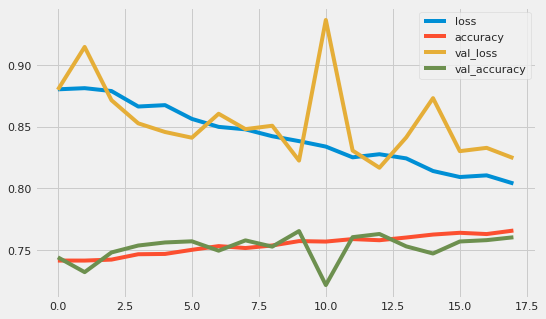

In [ ]:
pd.DataFrame(result1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()